In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import datasets
%matplotlib inline

## load data

In [74]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

## data selecting

In [75]:
# 3 loai hoa, 2 features de de truc quan
X = X[:150, [0,2] ]
y = y[:150]

### visualize data

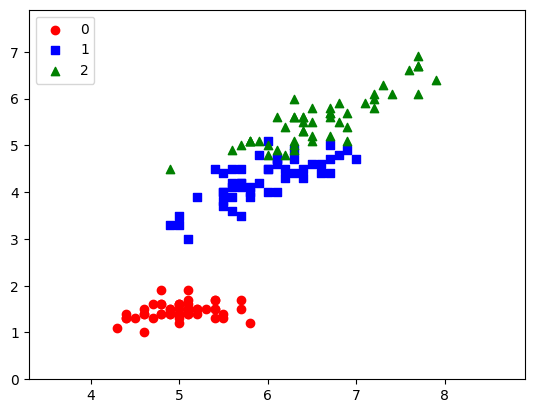

In [76]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='0')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='1')
plt.scatter(X[100:150, 0], X[100:150, 1], color='green', marker='^', label='2')
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.legend(loc='upper left')
plt.show()

## train test split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=1,
                                                    stratify=y)

In [79]:
'class distribution of y: ', np.bincount(y)

('class distribution of y: ', array([50, 50, 50], dtype=int64))

In [80]:
'class distribution of y train: ', np.bincount(y_train)

('class distribution of y train: ', array([35, 35, 35], dtype=int64))

In [81]:
'class distribution of y test: ', np.bincount(y_test)

('class distribution of y test: ', array([15, 15, 15], dtype=int64))

## feature scaling

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [84]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [85]:
X_train_std.mean(), X_train_std.std()

(8.205076829610681e-16, 1.0)

In [86]:
X_test_std.mean(), X_test_std.std()

(-0.057020664348500893, 0.9568765917064479)

## SVM

In [87]:
from sklearn.svm import SVC

In [88]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [89]:
y_predict = svm.predict(X_test_std)

## Validation

### prediction accuracy

In [91]:
round((y_predict == y_test).sum() / y_test.shape[0], 3)

0.911

## visualization

In [63]:
from matplotlib.colors import ListedColormap
def plot_desicion_boundary(X, y, classifier, test_idx):
    colors = ('red', 'blue', 'green', 'black')
    cmap = ListedColormap(colors[0:len(np.unique(y))])
    markers = ['o', 's', '^', '<']
    resolution = 0.02
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    xx1, xx2 = np.meshgrid(np.arange(x1_min - 1, x1_max + 1, resolution),
                            np.arange(x2_min - 1, x2_max + 1, resolution))
    labels = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    labels = labels.reshape(xx1.shape)
    plt.contourf(xx1, xx2, labels, cmap=cmap, alpha=0.2)

    for idx, class_ in enumerate(np.unique(y)):
        plt.scatter(X[y == class_, 0], X[y == class_, 1], color = colors[idx],
                    marker = markers[idx],
                   edgecolor='black')
    if test_idx:
        plt.scatter(X[test_idx, 0], X[test_idx, 1],
                    color='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                   marker='o',
                    s=100,
                    label='test set'
                   )

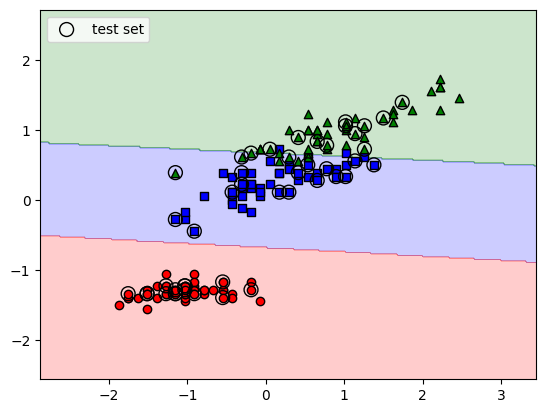

In [94]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_desicion_boundary(X_combined, y_combined, svm, test_idx = range(105, 150))

plt.legend(loc='upper left')
plt.show()


## kernel trick

In [101]:
k_svm = SVC(kernel='rbf',
            C=1.0,
            gamma=0.1,
           random_state=1)

In [102]:
k_svm.fit(X_train_std, y_train)

SVC(gamma=0.1, random_state=1)

In [103]:
y_predict = k_svm.predict(X_test_std)

### validation

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
accuracy_score(y_test, y_predict)

0.8

### visuallization

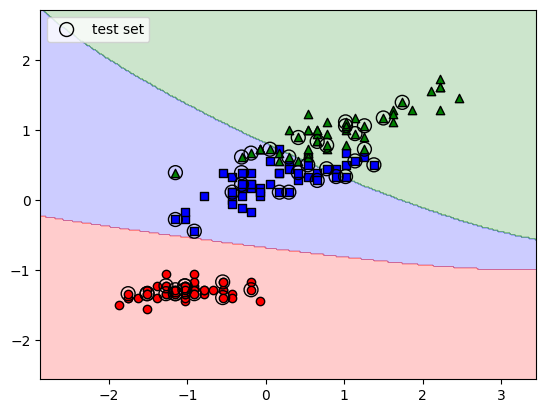

In [106]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_desicion_boundary(X_combined, y_combined, k_svm, test_idx = range(105, 150))

plt.legend(loc='upper left')
plt.show()


### test big gamma attribute

In [110]:
k_svm_bgamma = SVC(kernel='rbf',
                    gamma=100,
                    C=1,
                    random_state=1)
k_svm_bgamma.fit(X_train_std, y_train)

SVC(C=1, gamma=100, random_state=1)

In [111]:
accuracy_score(y_test, k_svm_bgamma.predict(X_test_std))

0.9555555555555556

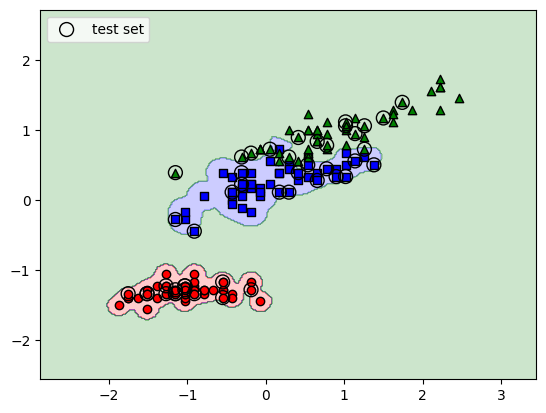

In [112]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_desicion_boundary(X_combined, y_combined, k_svm_bgamma, test_idx = range(105, 150))

plt.legend(loc='upper left')
plt.show()

